In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Simple CNN Implemented using Keras.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Load a sample dataset (MNIST for simplicity)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# Normalize and reshape data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, axis=-1) # Add channel dimension
x_test = np.expand_dims(x_test, axis=-1)
# Define a simple CNN model
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.9097 - loss: 0.2891 - val_accuracy: 0.9837 - val_loss: 0.0474
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.9864 - loss: 0.0451 - val_accuracy: 0.9879 - val_loss: 0.0364
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9908 - loss: 0.0284 - val_accuracy: 0.9902 - val_loss: 0.0291
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9935 - loss: 0.0202 - val_accuracy: 0.9904 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9950 - loss: 0.0166 - val_accuracy: 0.9873 - val_loss: 0.0381
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9825 - loss: 0.0489
Test accuracy: 0.9873
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted labels: [7 2 1 0 4]
Actual labels:  [7 2 1 0 4]


# **Exercise.**

Task 1: Data Understanding and Visualization:

• Get the list of class directories from the train folder.

• Select one image randomly from each class

• Display the images in a grid format with two rows using matplotlib.

In [3]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

train_path = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/train'
test_path = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/test'

In [4]:
class_dirs = [d for d in os.listdir(train_path)
              if os.path.isdir(os.path.join(train_path, d))]
class_dirs.sort()  # Sort alphabetically for consistent ordering

print("Found classes:", class_dirs)

Found classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [5]:
num_classes = len(class_dirs)
cols = (num_classes + 1) // 2

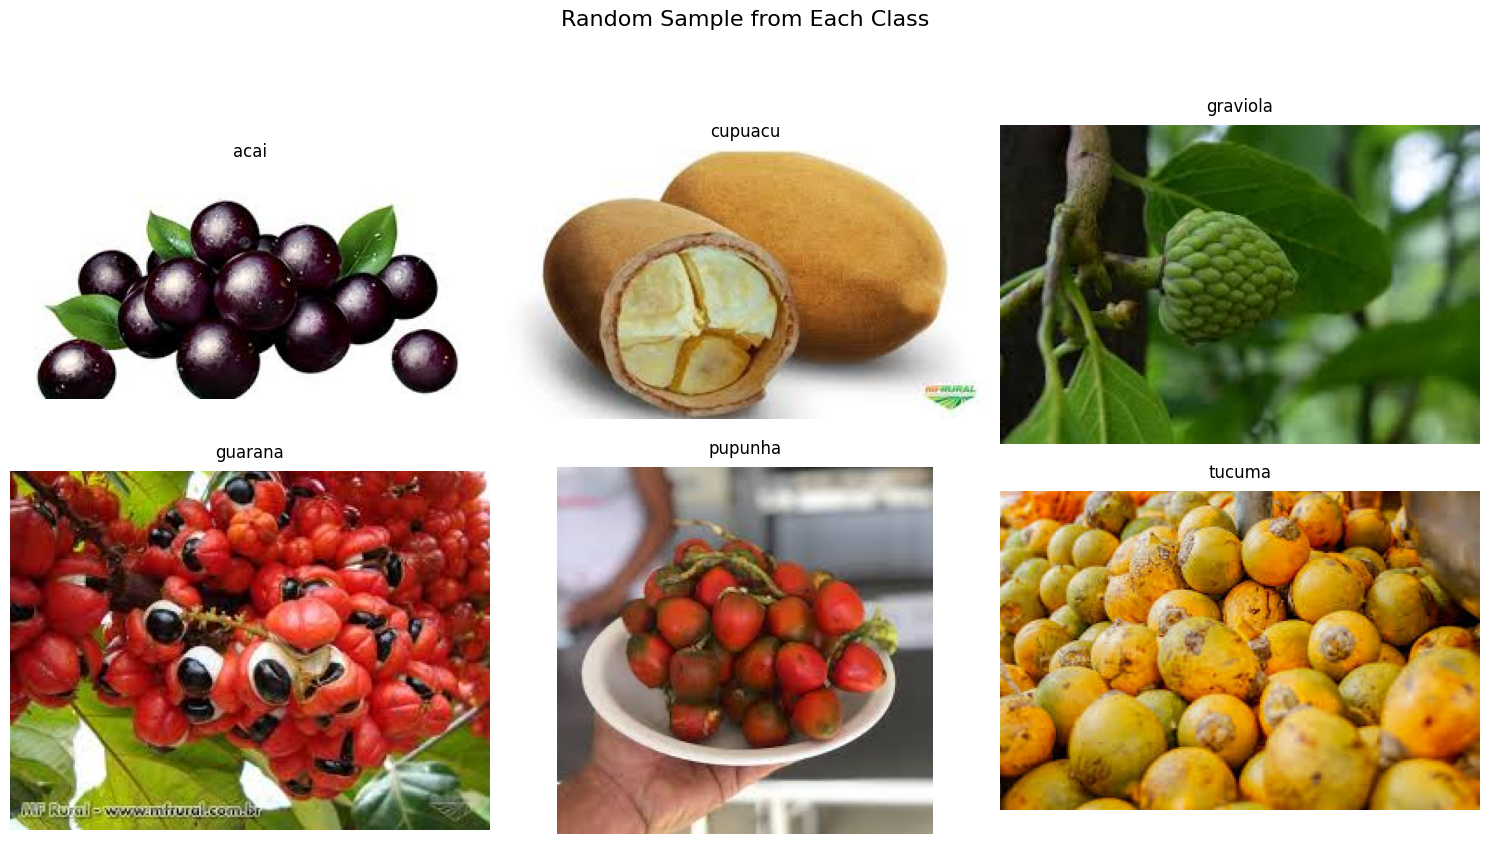

In [6]:
plt.figure(figsize=(15, 8))
plt.suptitle("Random Sample from Each Class", fontsize=16, y=1.05)

for i, class_name in enumerate(class_dirs):
    # Get all images in the class directory
    class_path = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(class_path)
             if os.path.isfile(os.path.join(class_path, f))]

    # Select a random image
    if images:  # Only proceed if there are images in the directory
        random_image = random.choice(images)
        img_path = os.path.join(class_path, random_image)

        # Open and display the image
        try:
            img = Image.open(img_path)

            # Create subplot
            plt.subplot(2, cols, i+1)
            plt.imshow(img)
            plt.title(class_name, pad=10)
            plt.axis('off')

        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    else:
        print(f"No images found in class: {class_name}")

plt.tight_layout()
plt.show()

What did you Observe?

Answer: The output lists six Amazonian fruit classes: acal, cupuacu, graviola, guarana, pupunha, and tucuma. The list provides a clear overview of the different fruit types contained in your dataset's training folder.

In [7]:
from PIL import ImageFile


def check_and_remove_corrupted_images(directory):
    corrupted_images = []

    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)

            if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                continue

            try:
                with Image.open(file_path) as img:
                    img.verify()

                with Image.open(file_path) as img:
                    img.load()
            except (IOError, SyntaxError, Image.DecompressionBombError) as e:
                print(f"Removed corrupted image: {file_path} - Error: {str(e)}")
                corrupted_images.append(file_path)
                os.remove(file_path)

    return corrupted_images


corrupted = check_and_remove_corrupted_images(train_path)

if not corrupted:
    print("No corrupted images found.")
else:
    print(f"\nTotal corrupted images removed: {len(corrupted)}")

No corrupted images found.


**Task 2: Loading and Preprocessing Image Data in keras:**

In [8]:
import tensorflow as tf

train_dir = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/train'
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2
seed = 123

train_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=seed
)

val_ds_unmapped = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=seed
)

class_names = train_ds_unmapped.class_names
print("Class names:", class_names)

normalization = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds_unmapped.map(lambda x, y: (normalization(x), y))
val_ds = val_ds_unmapped.map(lambda x, y: (normalization(x), y))

for images, labels in train_ds.take(1):
    print("\nFirst training batch:")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Pixel value range: ({:.2f}, {:.2f})".format(
        tf.reduce_min(images).numpy(),
        tf.reduce_max(images).numpy()
    ))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Class names: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']

First training batch:
Images shape: (32, 128, 128, 3)
Labels shape: (32,)
Pixel value range: (0.00, 1.00)


**Task 3 - Implement a CNN with**

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models


def create_cnn_model(input_shape=(128, 128, 3), num_classes=6):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Conv2D(32, (3, 3), strides=1, padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2), strides=2),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = create_cnn_model(input_shape=(img_height, img_width, 3), num_classes=len(class_names))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

**Task 4:**

Compile the Model

In [10]:
# Compile the model with recommended settings
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

extra_metrics = [
    tf.keras.metrics.SparseTopKCategoricalAccuracy(k=2, name='top2_accuracy'),
    tf.keras.metrics.SparseCategoricalCrossentropy(name='xentropy')
]

# Verify compilation
print("Model successfully compiled!")
print("Optimizer:", model.optimizer.get_config()['name'])
print("Loss function:", model.loss)
print("Metrics:", [m.name for m in model.metrics])

Model successfully compiled!
Optimizer: adam
Loss function: sparse_categorical_crossentropy
Metrics: ['loss', 'compile_metrics']


Train the Model

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.1493 - loss: 2.0510
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 637ms/step - accuracy: 0.1536 - loss: 2.0900 - val_accuracy: 0.1667 - val_loss: 2.5880
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.1800 - loss: 2.0450
Epoch 2: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 808ms/step - accuracy: 0.1801 - loss: 2.0337 - val_accuracy: 0.0000e+00 - val_loss: 1.9561
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.2604 - loss: 1.7840
Epoch 3: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 522ms/step - accuracy: 0.2578 - loss: 1.7828 - val_accuracy: 0.0556 - val_loss: 1.7847
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.2998 - loss: 1.7545
Epoch 4: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 446ms/step - accuracy: 0.3012 - loss: 1.7535 - val_accuracy: 0.1667 - val_loss: 1.7431
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.2454 - loss: 1.7197
Epoch 5: val_accuracy did not improve from 

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - accuracy: 0.2600 - loss: 1.5735 - val_accuracy: 0.2778 - val_loss: 1.6787
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.3837 - loss: 1.4513
Epoch 8: val_accuracy improved from 0.27778 to 0.55556, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 876ms/step - accuracy: 0.3919 - loss: 1.4458 - val_accuracy: 0.5556 - val_loss: 1.5198
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 688ms/step - accuracy: 0.7101 - loss: 1.2952
Epoch 9: val_accuracy improved from 0.55556 to 0.61111, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 977ms/step - accuracy: 0.7096 - loss: 1.2874 - val_accuracy: 0.6111 - val_loss: 1.4326
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.6707 - loss: 1.0596
Epoch 10: val_accuracy improved from 0.61111 to 0.72222, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 883ms/step - accuracy: 0.6662 - loss: 1.0640 - val_accuracy: 0.7222 - val_loss: 1.1280
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 748ms/step - accuracy: 0.8744 - loss: 0.8178
Epoch 11: val_accuracy did not improve from 0.72222
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 943ms/step - accuracy: 0.8780 - loss: 0.8124 - val_accuracy: 0.2778 - val_loss: 1.5147
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 724ms/step - accuracy: 0.7743 - loss: 0.6928
Epoch 12: val_accuracy improved from 0.72222 to 0.83333, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 972ms/step - accuracy: 0.7786 - loss: 0.6823 - val_accuracy: 0.8333 - val_loss: 0.5272
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.7998 - loss: 0.4981
Epoch 13: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 454ms/step - accuracy: 0.8012 - loss: 0.4983 - val_accuracy: 0.2778 - val_loss: 1.6052
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.8096 - loss: 0.5118
Epoch 14: val_accuracy did not improve from 0.83333
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.8121 - loss: 0.5102 - val_accuracy: 0.6111 - val_loss: 0.8482
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9404 - loss: 0.2364
Epoch 15: val_accuracy improved from 0.83333 to 0.94444, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 583ms/step - accuracy: 0.9379 - loss: 0.2370 - val_accuracy: 0.9444 - val_loss: 0.3937
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.9294 - loss: 0.2180
Epoch 16: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 719ms/step - accuracy: 0.9332 - loss: 0.2197 - val_accuracy: 0.8333 - val_loss: 0.6744
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - accuracy: 0.9803 - loss: 0.1186
Epoch 17: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 905ms/step - accuracy: 0.9783 - loss: 0.1207 - val_accuracy: 0.6111 - val_loss: 0.9446
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.9190 - loss: 0.1450
Epoch 18: val_accuracy did not improve from 0.94444
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 448ms/step - accuracy: 0.9253 - loss: 0.1385 - val_accuracy: 0.8333 - val_loss: 0.4491
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 1.0000 - loss: 0.0468
Epoch 19: val_accuracy did not improve f

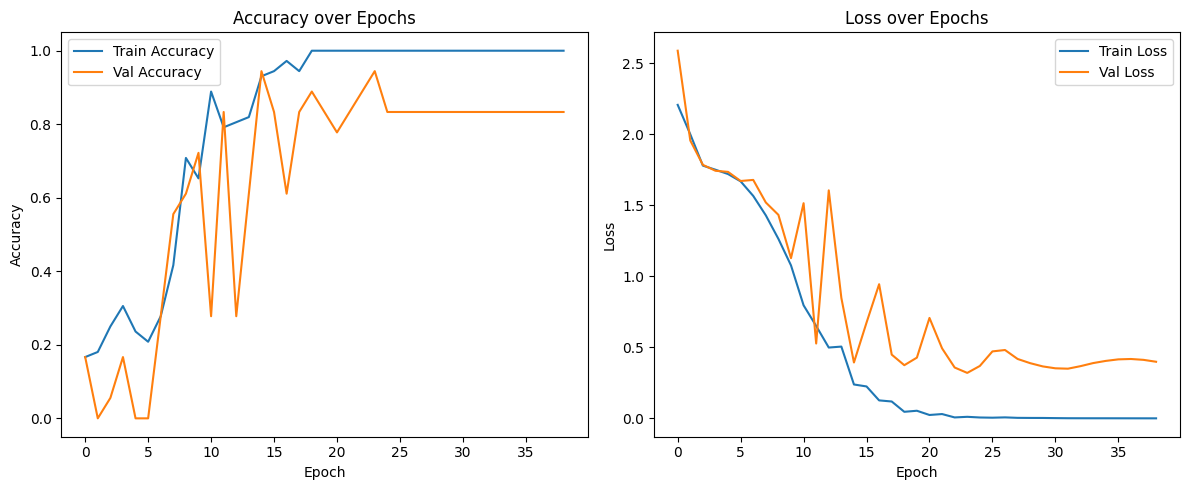

In [11]:
import numpy as np
from sklearn.metrics import classification_report

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True,
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Task 5: Evaluate the Model**

In [12]:
# Load test dataset
test_dir = '/content/drive/MyDrive/Final-Year AI/week5/FruitinAmazon/test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int'
).map(lambda x, y: (normalization(x), y))

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_ds)
print(f'\nTest Accuracy: {test_acc:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7000 - loss: 0.8806

Test Accuracy: 0.7000
Test Loss: 0.8806


**Task 6: Save and Load the Model**

In [13]:
model.save('fruit_classifier.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('fruit_classifier.h5')

# Verify loaded model
loaded_loss, loaded_acc = loaded_model.evaluate(test_ds)
print(f'\nLoaded Model Test Accuracy: {loaded_acc:.4f}')
print(f'Loaded Model Test Loss: {loaded_loss:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - accuracy: 0.7000 - loss: 0.8806

Loaded Model Test Accuracy: 0.7000
Loaded Model Test Loss: 0.8806


**Task 7: Predictions and Classification Report**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step

Classification Report:
              precision    recall  f1-score   support

        acai       0.57      0.80      0.67         5
     cupuacu       0.67      0.80      0.73         5
    graviola       0.83      1.00      0.91         5
     guarana       1.00      0.40      0.57         5
     pupunha       1.00      0.80      0.89         5
      tucuma       0.40      0.40      0.40         5

    accuracy                           0.70        30
   macro avg       0.75      0.70      0.69        30
weighted avg       0.75      0.70      0.69        30



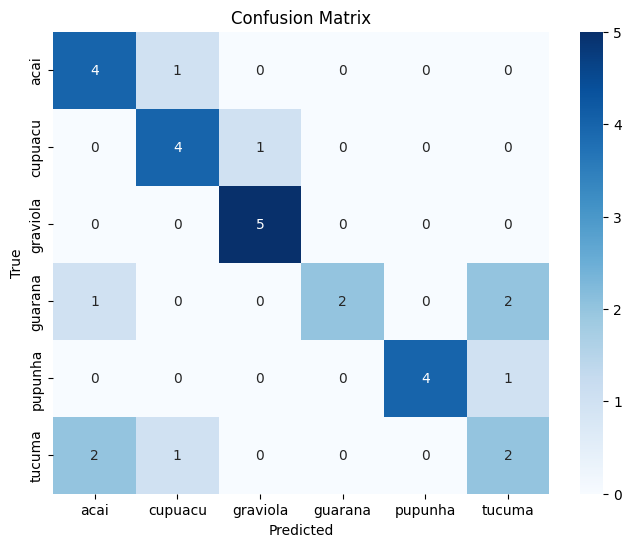

In [14]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(loaded_model.predict(images), axis=1))

# Classification report
print('\nClassification Report:')
print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

# Confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()